In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pystan
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel("./data/real_estate1.xlsx")

In [4]:
df.head()

,id,space,room,value
0,1,50,2LDK,3050
1,2,70,2LDK,4690
2,3,70,2SLDK,4830
3,4,70,3LDK,5040
4,5,90,3LDK,6570


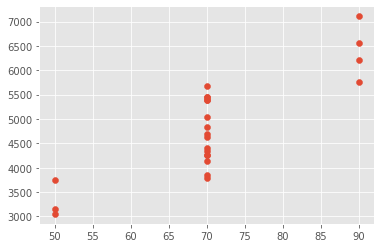

In [5]:
plt.scatter(df["space"], df["value"])

In [6]:
model_code = """
data {
    int N;
    real X[N];
    real Y[N];
}

parameters {
    real a;
    real b;
    real<lower=0> sigma;
}

model {
    for (n in 1:N){
        Y[n] ~ normal(a * X[n] + b, sigma);
    }
}
"""

In [7]:
sm = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_642c8617ba83a023c9fbfe9541832456 NOW.


In [9]:
stan_data = {"N": df.shape[0], "X": df["space"], "Y": df["value"]}

In [10]:
fit = sm.sampling(data = stan_data, iter = 2000, warmup = 500, chains = 3, seed = 123)

In [11]:
fit

Inference for Stan model: anon_model_642c8617ba83a023c9fbfe9541832456.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      79.03    0.34  11.64  55.52  71.61  78.88  86.74  102.2   1175    1.0
b     -764.1   24.21 834.46  -2433  -1315 -764.7 -230.8 907.49   1188    1.0
sigma 614.85    2.95 106.34  447.4 540.73 601.81 673.65 855.25   1303    1.0
lp__  -152.0    0.04   1.35 -155.3 -152.6 -151.6 -151.0 -150.5   1096    1.0

Samples were drawn using NUTS at Tue Mar 17 21:01:20 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

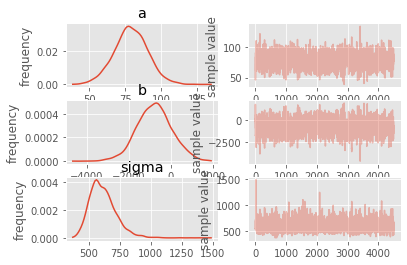

In [12]:
fig = fit.plot()

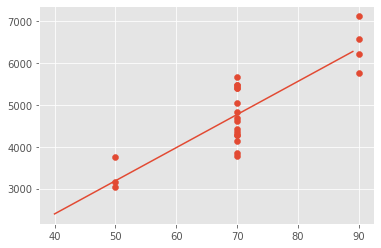

In [15]:
a = 79.03
b = -764.1
x = np.arange(40, 90, 1)
y = a * x + b
plt.plot(x, y)
plt.scatter(df["space"], df["value"])